In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np

import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
%matplotlib inline
np.random.seed(0)

In [3]:
xy_tr = np.loadtxt('train.txt');
xy_te = np.loadtxt('test.txt');
xy_tr.shape, xy_te.shape

((200000, 15), (200000, 15))

Training:  (200000, 14) (200000,)
Test:  (200000, 14) (200000,)


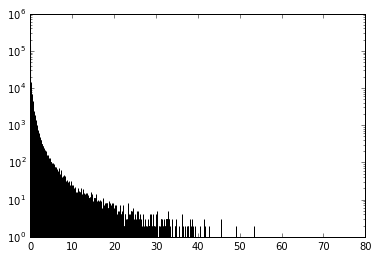

In [4]:
Xtr,Ytr = xy_tr[:,:-1],xy_tr[:,-1];
Xte,Yte = xy_te[:,:-1],xy_te[:,-1];
print("Training: ", Xtr.shape, Ytr.shape)
print("Test: ", Xtr.shape, Ytr.shape)
plt.hist(Ytr, bins='auto', log=True)
plt.hist(Yte, bins='auto', log=True)
plt.show()

In [5]:
print(np.mean(Ytr > .0), np.mean(Yte > .0))
print(np.mean(Ytr > .1), np.mean(Yte > .1))
print(np.mean(Ytr > .05), np.mean(Yte > .05))
print(np.mean(Ytr == 0.0), np.mean(Yte == 0.0))

0.367245 0.316975
0.293915 0.25502
0.367245 0.316975
0.632755 0.683025


In [6]:
X=np.vstack( (Xtr,Xte) )
Y=np.hstack( (Ytr,Yte) )
print(X.shape, Y.shape)
order = np.random.permutation( X.shape[0] )
nTrain = 200000
nTest  = 200000
Xtr,Ytr = X[order[:nTrain],:], Y[order[:nTrain]]
Xte,Yte = X[order[nTrain:nTrain+nTest],:], Y[order[nTrain:nTrain+nTest]]
print("Training: ", Xtr.shape, Ytr.shape)
print("Test: ", Xtr.shape, Ytr.shape)

(400000, 14) (400000,)
Training:  (200000, 14) (200000,)
Test:  (200000, 14) (200000,)


In [7]:
# binarize the labels
Ytr01 = (Ytr>0.0).astype('int');
Yte01 = (Yte>0.0).astype('int');
np.mean(Ytr01), np.mean(Yte01)

(0.34289500000000001, 0.34132499999999999)

In [8]:
# Now save to files
np.savetxt('X_train.txt',Xtr);
np.savetxt('X_test.txt',Xte);

np.savetxt('Y_train.txt',Ytr01,'%d')
np.savetxt('Y_test.txt',Yte01,'%d')

# Upload to Kaggle
np.savetxt('Y_test_kaggle.txt',np.vstack((np.arange(len(Yte01)),Yte01)).T,'%d',header='ID,Target',comments='',delimiter=',')

In [ ]:
# we are done!